Source
https://www.kaggle.com/faressayah/practical-introduction-to-10-regression-algorithm

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [6]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Impute/Data ISPU - Impute.xlsx", sheet_name="DKI1")
DKI2 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI2")
DKI3 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI3")
DKI4 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI4")
DKI5 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI5")

In [7]:
DKI1.head()

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),63.0,34.0,25.0,21.0,2.0,63.0,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),16.0,32.0,16.0,19.0,1.0,32.0,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),18.0,32.0,17.0,20.0,2.0,32.0,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),24.0,32.0,22.0,20.0,2.0,32.0,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),29.0,32.0,25.0,14.0,2.0,32.0,SO2,Baik


In [8]:
DKI1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1765 non-null   datetime64[ns]
 1   Wilayah   1765 non-null   object        
 2   PM10      1765 non-null   float64       
 3   SO2       1765 non-null   float64       
 4   CO        1765 non-null   float64       
 5   O3        1765 non-null   float64       
 6   NO2       1765 non-null   float64       
 7   Max       1765 non-null   float64       
 8   Critical  1731 non-null   object        
 9   Kategori  1765 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 138.0+ KB


In [9]:
DKI1.describe()

,PM10,SO2,CO,O3,NO2,Max
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,48.649308,18.222851,17.290699,43.934379,12.439075,59.640185
std,13.898191,10.553626,7.432516,25.224814,10.669300,21.583866
min,4.000000,1.000000,3.000000,3.000000,1.000000,5.000000
25%,40.000000,12.000000,12.000000,25.000000,4.000000,46.000000
50%,52.000000,18.000000,17.284799,38.000000,10.000000,59.000000
75%,58.000000,22.000000,21.000000,59.000000,16.000000,72.000000
max,86.000000,106.000000,51.000000,198.000000,79.000000,198.000000


In [10]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

Exploratory Data Analysis (EDA)

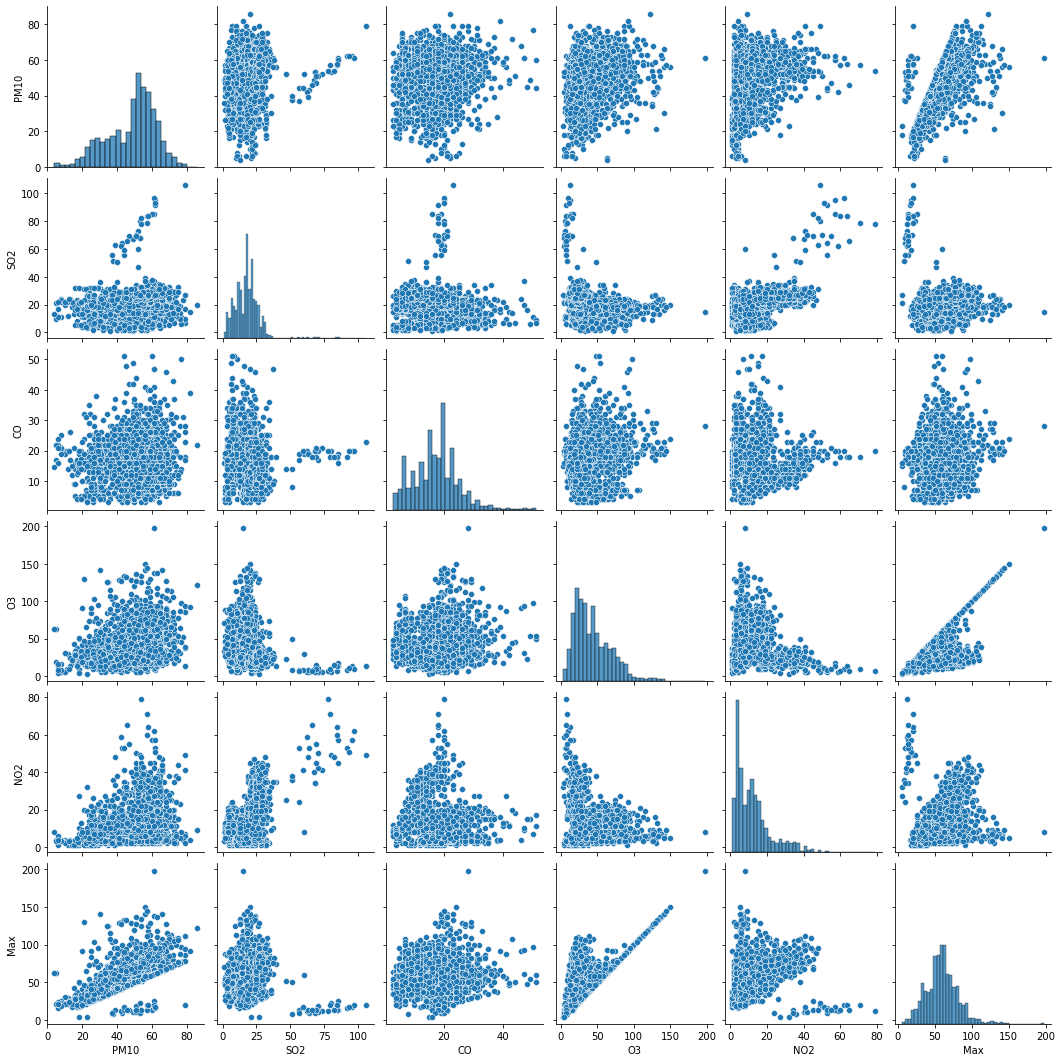

In [11]:
sns.pairplot(DKI1)

In [32]:
DKI1.hvplot.hist(by="Tanggal", subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Max]   (Max_count)

In [33]:
DKI1.hvplot.hist("Tanggal")

:Histogram   [Tanggal]   (Tanggal_count)

In [34]:
DKI1.hvplot.scatter(x='PM10', y='Tanggal')

:Scatter   [PM10]   (Tanggal)

In [35]:
DKI1.hvplot.scatter(x='SO2', y='Tanggal')

:Scatter   [SO2]   (Tanggal)

In [30]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

<AxesSubplot:>

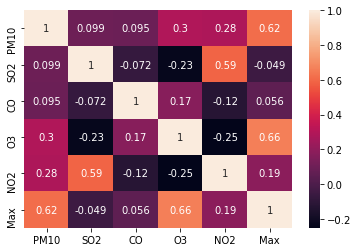

In [31]:
sns.heatmap(DKI1.corr(), annot=True)

Training a Linear Regression Model

In [36]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

X and y arrays

In [41]:
X = DKI1[['PM10', 'SO2', 'CO', 'O3', 'NO2']]
y = DKI1['Tanggal']

Train test split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

📦 Preparing Data For Linear Regression

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

✔️ Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

✔️ Model Evaluation

In [46]:
# print the intercept
print(lin_reg.intercept_)

1.5588988994331983e+18


In [47]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
PM10,2.707554e+15
SO2,-7.232687e+15
CO,-1.851991e+16
O3,-3.728734e+15
NO2,3.197177e+16


✔️ Predictions from our Model

In [48]:
pred = lin_reg.predict(X_test)

In [49]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

Residual Histogram

In [50]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

✔️ Regression Evaluation Metrics

In [84]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('float64') and dtype('<M8[ns]')